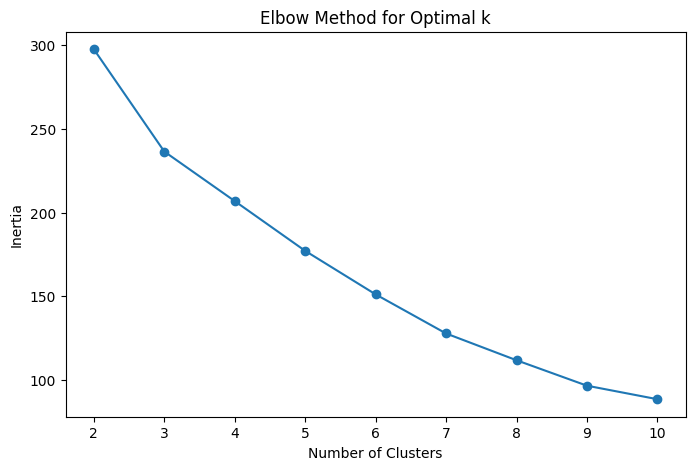

Davies-Bouldin Index: 1.4337118508381193
Silhouette Score: 0.22411729810825867


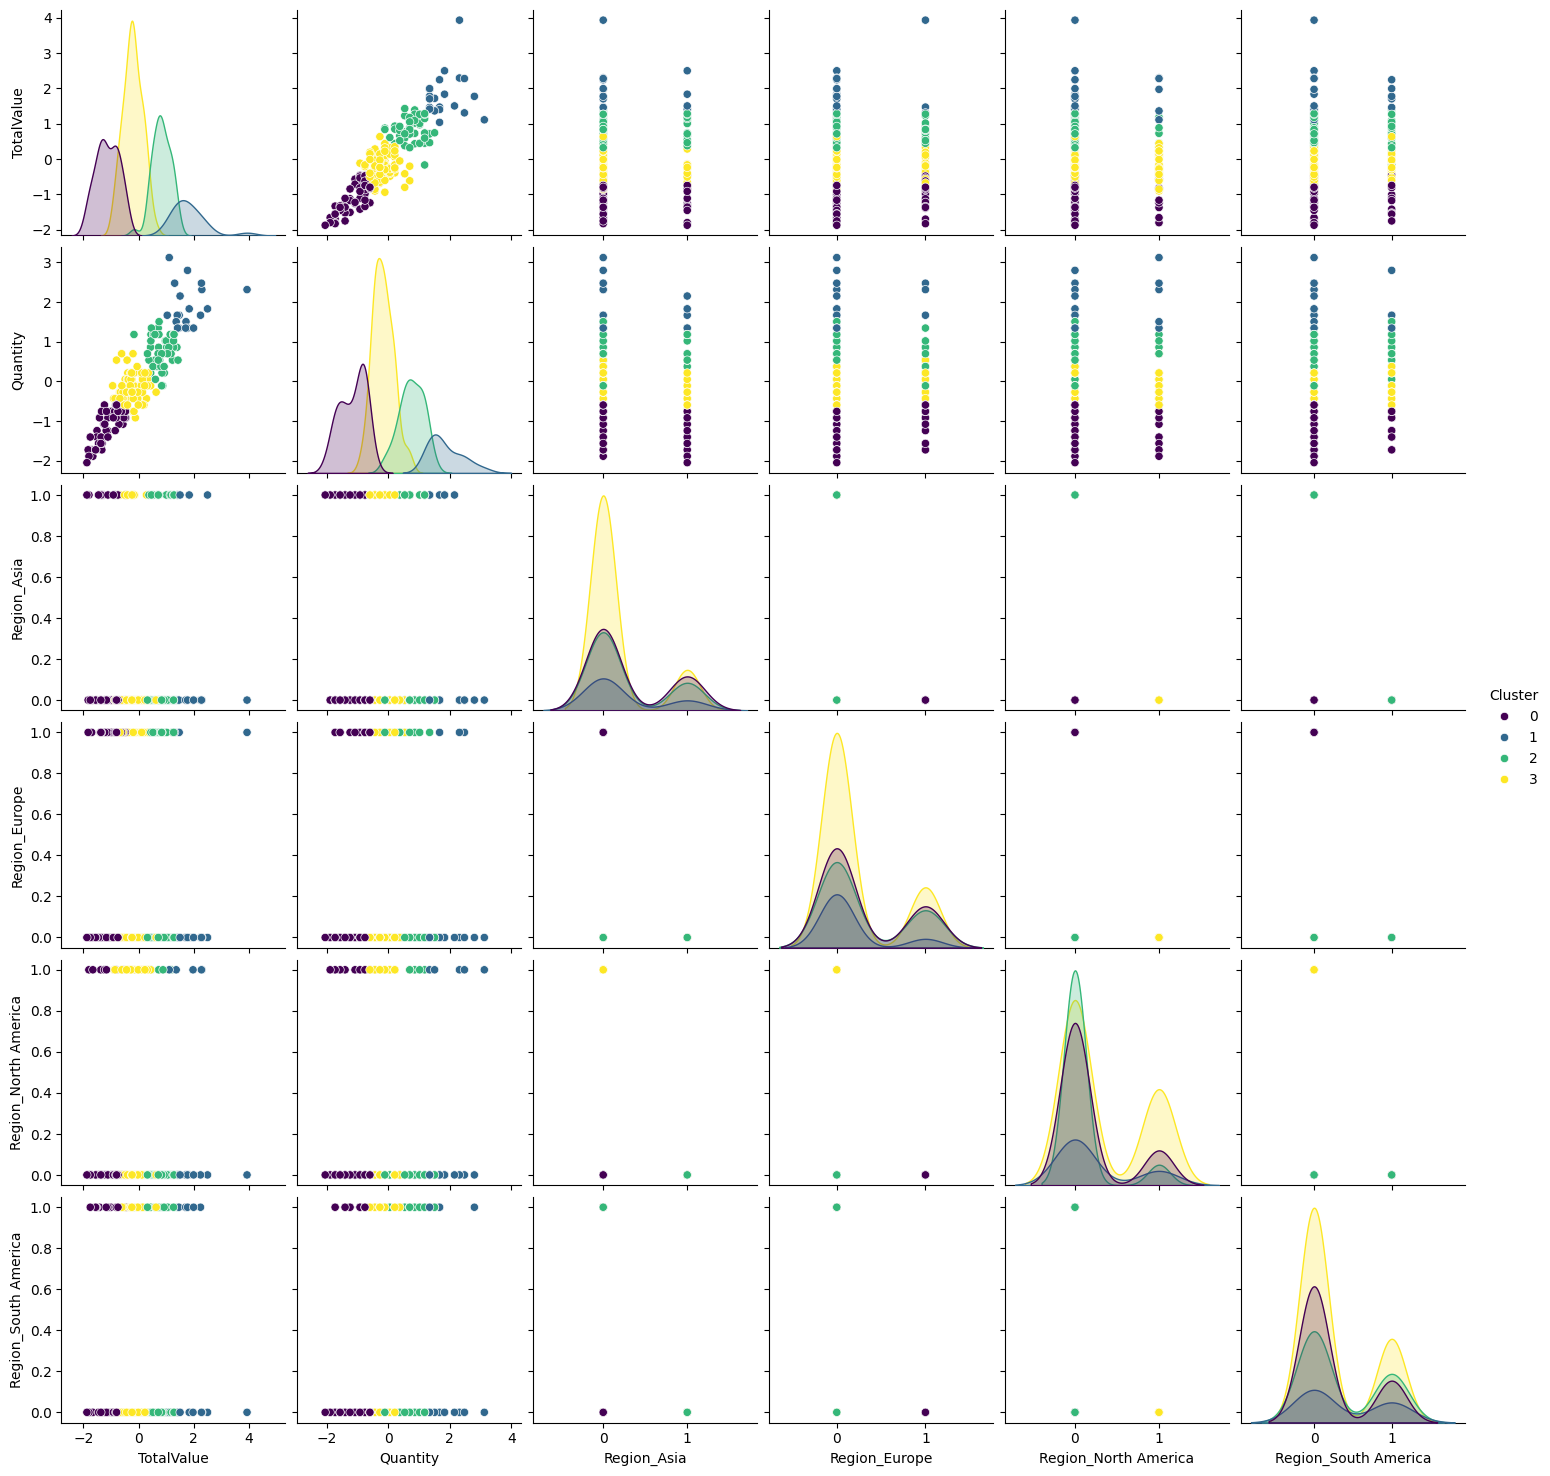

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Load Data
customers = pd.read_csv('C:/Users/LOKESH/OneDrive/Desktop/DATA SCIENCE ASSESMENT/Customers.csv')
transactions = pd.read_csv('C:/Users/LOKESH/OneDrive/Desktop/DATA SCIENCE ASSESMENT/Transactions.csv')

# Data Preprocessing
# Aggregate transaction data to customer level
transaction_features = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total amount spent
    'Quantity': 'sum'  # Total quantity purchased
}).reset_index()

# Merge with customer profile information
customer_data = customers.merge(transaction_features, on='CustomerID', how='left')

# Fill missing values
customer_data.fillna(0, inplace=True)

# Encode categorical features (e.g., 'Region')
customer_data = pd.get_dummies(customer_data, columns=['Region'])

# Normalize numerical features
scaler = StandardScaler()
numeric_cols = ['TotalValue', 'Quantity']
customer_data[numeric_cols] = scaler.fit_transform(customer_data[numeric_cols])

# Feature selection for clustering
features = customer_data.drop(columns=['CustomerID', 'CustomerName', 'SignupDate'])

# Determine optimal number of clusters using the Elbow Method
inertia = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Apply K-Means clustering with optimal k (choose based on elbow plot)
k_optimal = 4  # Example value, adjust based on elbow plot
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
customer_data['Cluster'] = kmeans.fit_predict(features)

# Evaluate clustering using Davies-Bouldin Index and Silhouette Score
db_index = davies_bouldin_score(features, customer_data['Cluster'])
silhouette_avg = silhouette_score(features, customer_data['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')
print(f'Silhouette Score: {silhouette_avg}')

# Visualizing clusters using pairplot
sns.pairplot(customer_data, hue='Cluster', diag_kind='kde', palette='viridis')
plt.show()
